In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def reduce(array):
    for i in range(len(array)-1, 0, -1):
        array[i] = array[i] - array[i-1]
    return array

In [7]:
dt = pd.read_csv('results.csv', index_col=0)
dt.conv = reduce(dt.conv.values)

dt2 = pd.read_csv('results2.csv', index_col=0)
dt2.conv = reduce(dt2.conv.values)

In [16]:
gb_mean = dt[dt['p'] == 1].groupby(['n_shots', 'size_gen']).mean()
gb_std = dt[dt['p'] == 1].groupby(['n_shots', 'size_gen']).std()

gb_mean2 = dt2[dt2['p'] == 2].groupby(['n_shots', 'size_gen']).mean()
gb_std2 = dt2[dt2['p'] == 2].groupby(['n_shots', 'size_gen']).std()

Podemos ver que cuanto mayor sea la población más tardará obviamente. Pero, es curioso como para mayor número de shots e igual tamaño de población esto no parace aumentar el tiempo, sino decrecerlo. Además los tiempo de computo parecen menores en el caso de 200 shots que para 50 y 100 shots. 

Pocos shots hace que se necesite un mayor número de iteraciones para poder converger.

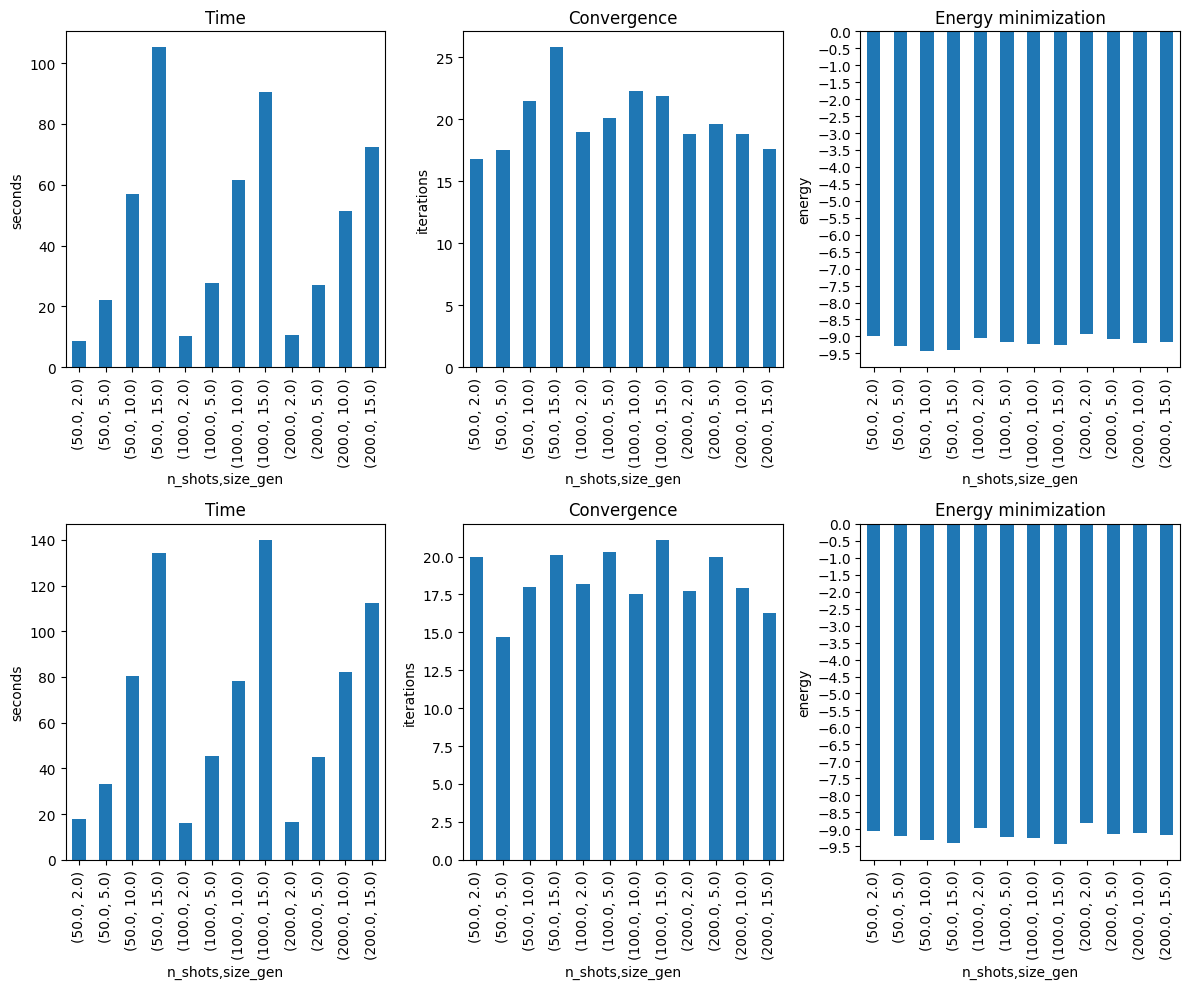

In [28]:
plt.figure(figsize=(12,10))
# plt.suptitle('$p = 1$')
plt.subplot(231)
plt.title('Time')
gb_mean.time.plot.bar()
plt.ylabel('seconds')
plt.subplot(232)
plt.title('Convergence')
gb_mean.conv.plot.bar()
plt.ylabel('iterations')
plt.subplot(233)
plt.title('Energy minimization')
gb_mean.best_cost.plot.bar()
plt.yticks(np.arange(0, -10, -0.5))
plt.ylabel('energy')

plt.subplot(234)
plt.title('Time')
gb_mean2.time.plot.bar()
plt.ylabel('seconds')
plt.subplot(235)
plt.title('Convergence')
gb_mean2.conv.plot.bar()
plt.ylabel('iterations')
plt.subplot(236)
plt.title('Energy minimization')
gb_mean2.best_cost.plot.bar()
plt.ylabel('energy')
plt.yticks(np.arange(0, -10, -0.5))

plt.tight_layout()
plt.show()

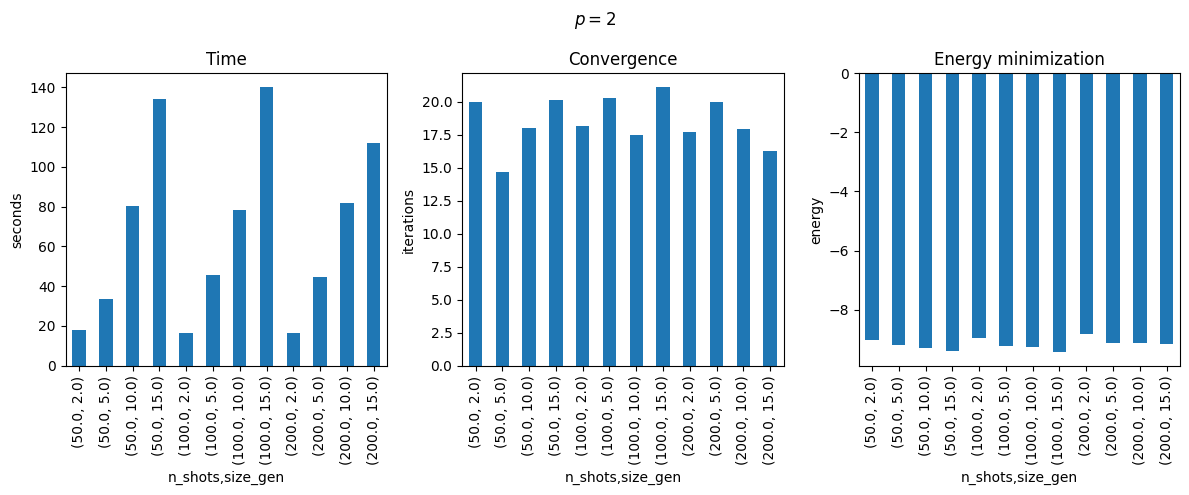

In [17]:
plt.figure(figsize=(12,5))
plt.suptitle('$p = 2$')
plt.subplot(131)
plt.title('Time')
gb_mean2.time.plot.bar()
plt.ylabel('seconds')
plt.subplot(132)
plt.title('Convergence')
gb_mean2.conv.plot.bar()
plt.ylabel('iterations')
plt.subplot(133)
plt.title('Energy minimization')
gb_mean2.best_cost.plot.bar()
plt.ylabel('energy')
plt.tight_layout()
plt.show()

El tiempo está completamente correlacionado con el número de iteraciones obviamente. podemos ver algún anómalo con pocas iteraciones y mucho tiempo, pero nunca el caso contratio.

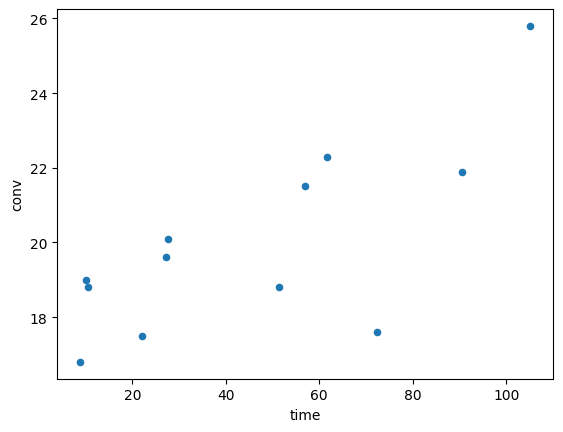

In [45]:
dt[dt['p'] == 1].groupby(['n_shots', 'size_gen']).mean()[['time', 'conv']].plot(kind='scatter', x='time', y='conv')
plt.show()

# Comparison with other optimizers

In [40]:
dt_results = pd.read_csv('output_optimizers.csv', index_col=0)
dt_results.head()

,opt,it,p,best_cost,time
0,COBYLA,0,1,-5.046151,3.977849
1,COBYLA,1,1,-5.046165,3.489010
2,COBYLA,2,1,-3.547149,2.709357
3,COBYLA,3,1,-4.189855,3.258352
4,COBYLA,4,1,-2.506879,3.722884


In [41]:
dt_results.groupby(['opt', 'p']).mean()

it  best_cost        time
opt      p                            
ADAM     1  4.5  -3.321541   37.229180
         2  4.5  -5.630691  131.555116
COBYLA   1  4.5  -4.439211    3.182063
         2  4.5  -4.605531   12.107468
         3  4.5  -4.949688   34.576855
         4  4.5  -4.847898   51.892381
         5  4.5  -4.433526   74.767605
         6  4.5  -3.854572   92.970005
         7  4.5  -4.070842  110.420014
L_BFGS_B 1  4.5  -3.702695    2.484611
         2  4.5  -5.575622    9.251165
         3  4.5  -5.858545   22.235276
         4  4.5  -4.770032   47.623243
         5  4.5  -5.274363   77.762317
         6  4.5  -5.203244   94.443598
         7  4.5  -4.489563  112.153443
SLSQP    1  4.5  -4.194703    2.461986
         2  4.5  -4.876464    7.276731
         3  4.5  -4.742560   14.233156
         4  4.5  -4.433801   32.394476
         5  4.5  -5.235524   50.996702
         6  4.5  -5.640439   96.352251
         7  4.5  -5.157491  122.899755